In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
T         731 non-null float64
TM        731 non-null float64
Tm        731 non-null float64
SLP       731 non-null float64
H         731 non-null float64
VV        731 non-null float64
V         731 non-null float64
VM        731 non-null float64
PM 2.5    730 non-null float64
dtypes: float64(9)
memory usage: 51.5 KB


c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


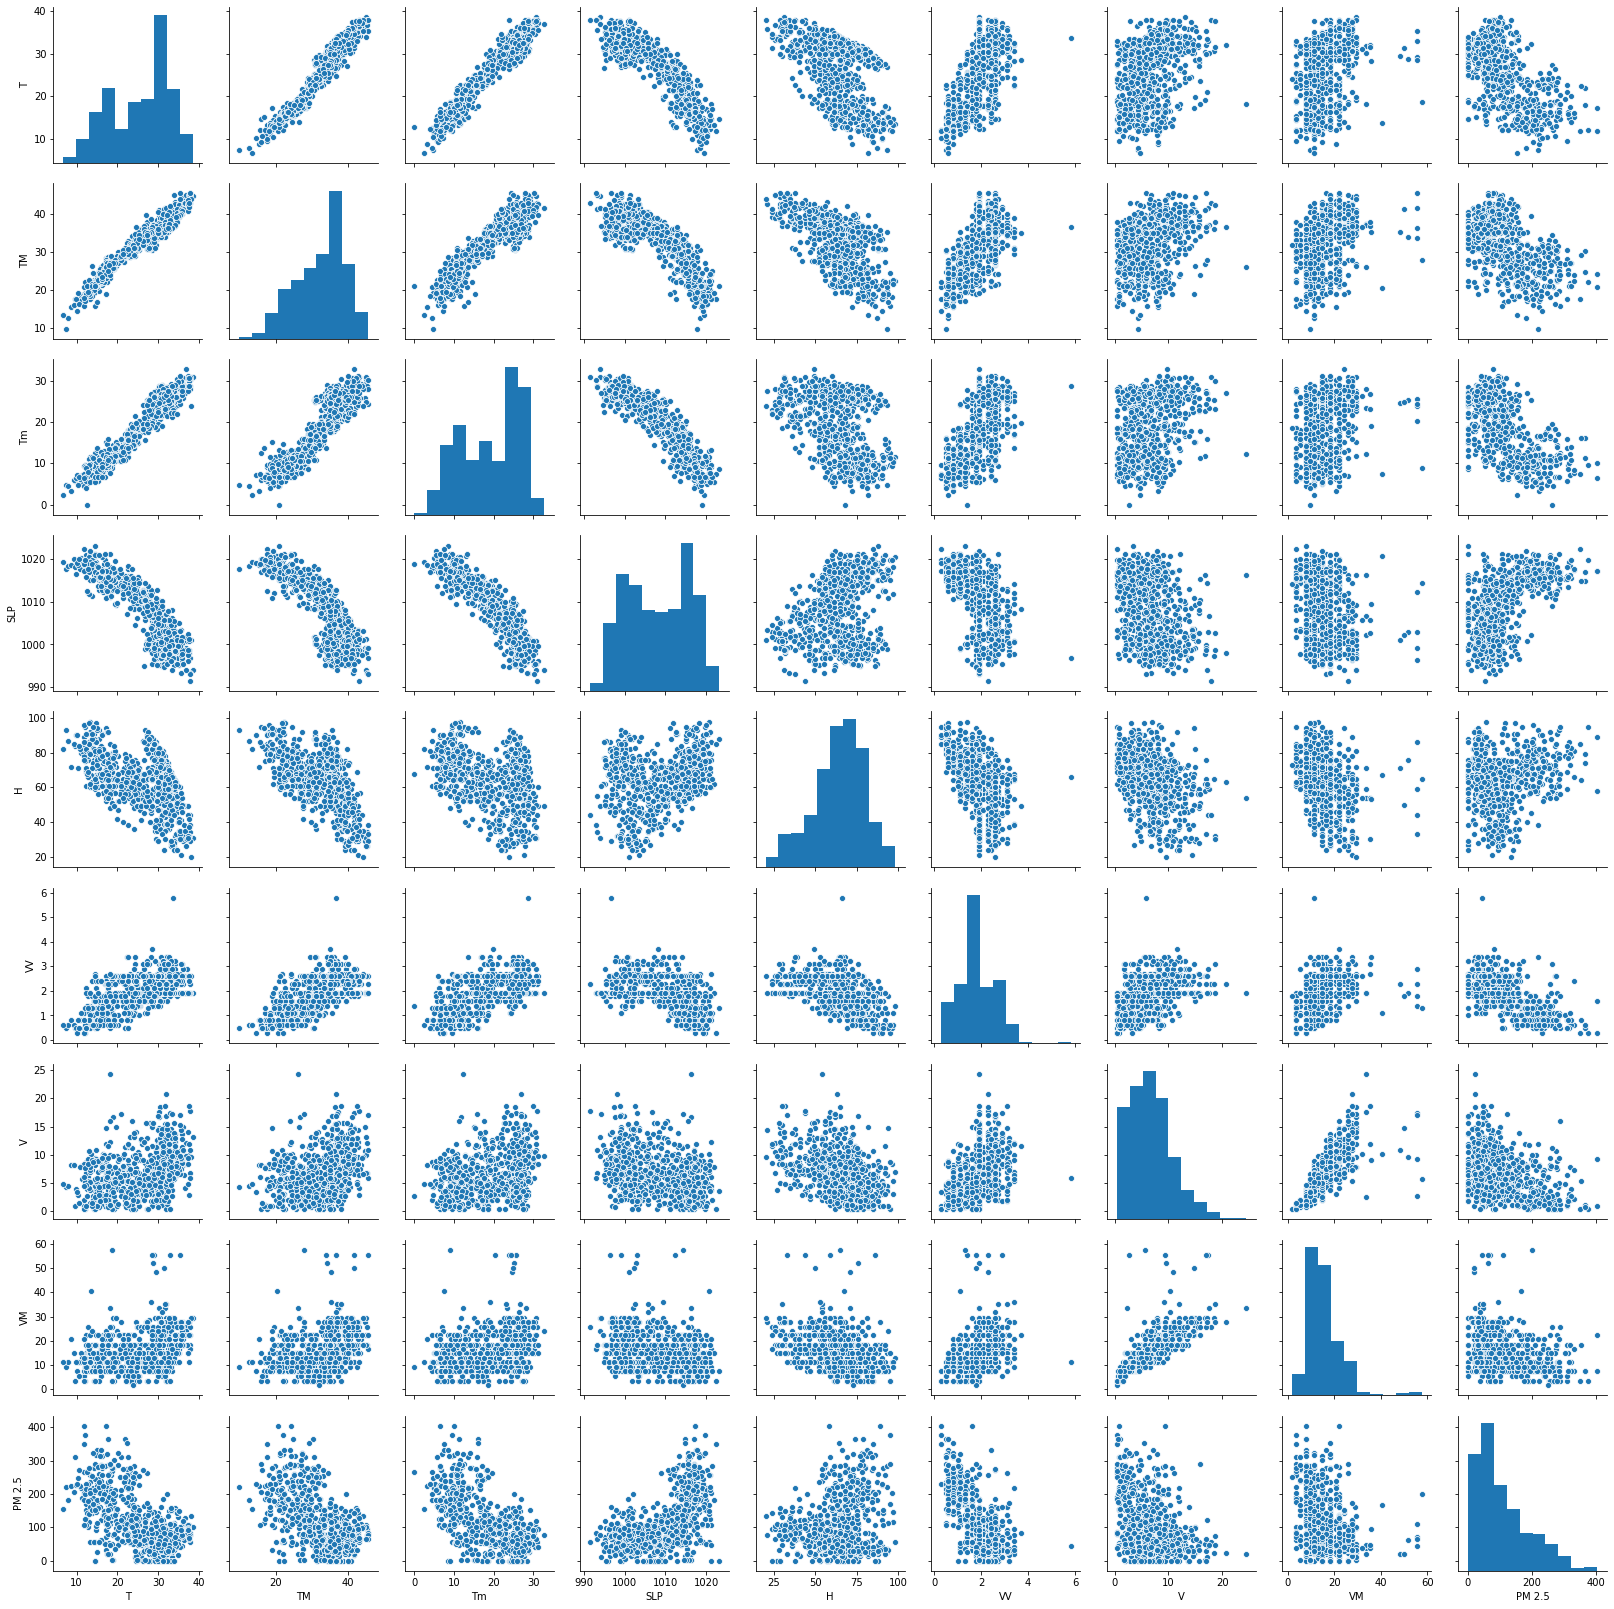

In [6]:
sns.pairplot(df)

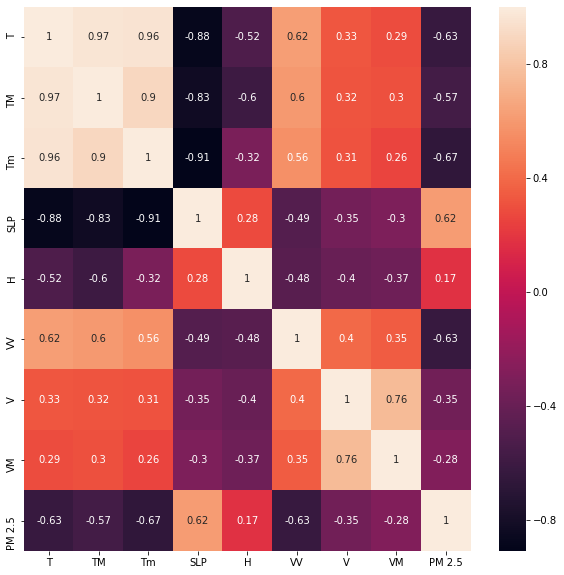

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

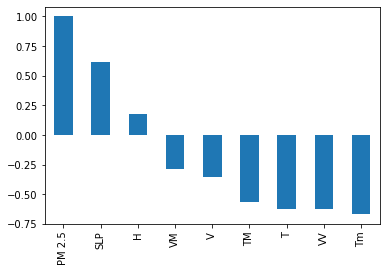

In [8]:
df.corr()['PM 2.5'].sort_values(ascending=False).plot(kind='bar')

In [9]:
from sklearn.ensemble import ExtraTreesRegressor

In [10]:
df.dropna(inplace=True)
X=df.iloc[:,:-1]
y=df['PM 2.5']


In [11]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

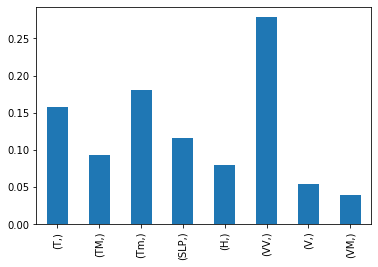

In [12]:
feat=pd.Series(model.feature_importances_,index=[X.columns])
feat.plot(kind='bar')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)

pred=lr.predict(x_test)


print('train score',lr.score(x_train,y_train))

print('test score',lr.score(x_test,y_test))

train score 0.5686375556542702
test score 0.6151867979583971


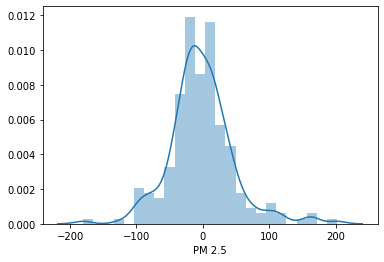

In [15]:
sns.distplot(y_test-pred)

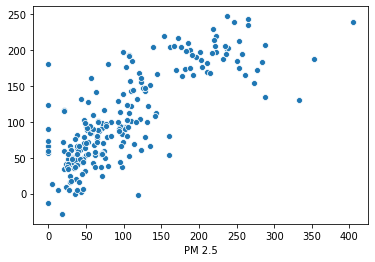

In [16]:
sns.scatterplot(y_test,pred)

In [17]:
#Assumptions of Linear regression

#sum of residuals should be zero
resid=y_test-pred
sum(resid)

-456.5203568780529

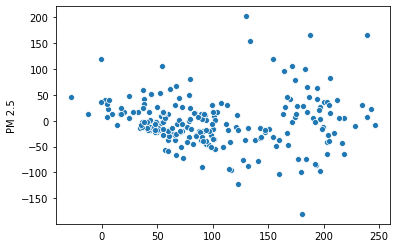

In [18]:
#Hetrscadacity
sns.scatterplot(pred,resid)



In [19]:
print('R2 value is',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',np.mean((y_test-pred)**2))

R2 value is 0.6151867979583971
MAE 35.32287588223622
MSE 2413.894508257962


In [20]:
#SInce we can see that train error is more than test error , its overfitting, we can use regularization
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import cross_val_score,GridSearchCV

In [21]:
rd=Ridge()
params={'alpha':[0,0.01,0.05,0.10,0.25,0.5,1,10,20]}
gs=GridSearchCV(rd,param_grid=params,scoring='neg_mean_squared_error',cv=4)

In [22]:
gs.fit(X,y)


GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [23]:
gs.best_score_

-3360.587544114483

# LASSO

In [24]:
lasso=Lasso()
params={'alpha':[0,0.01,0.05,0.10,0.25,0.5,1,10,20]}
gs=GridSearchCV(lasso,param_grid=params,scoring='neg_mean_squared_error',cv=5)
gs.fit(X,y)


c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900787.4080192778, tolerance: 424.6893591679955
  positive)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0,

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [25]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)
pred=lasso.predict(x_test)

print('R2 value is',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',np.mean((y_test-pred)**2))
print()

print('train score',lasso.score(x_train,y_train))
print()
print('test score',lasso.score(x_test,y_test))

R2 value is 0.6170852610776121
MAE 35.24252009823966
MSE 2401.985640076492

train score 0.567633634348527

test score 0.6170852610776121


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('R2 value is',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',np.mean((y_test-pred)**2))
print()

print('train score',dt.score(x_train,y_train))
print()
print('test score',dt.score(x_test,y_test))



#its worse than Linear reggression.lets tune hyperparametre

R2 value is 0.4496076527621278
MAE 41.14495814307458
MSE 3452.555830558727

train score 1.0

test score 0.4496076527621278


In [28]:
params={'splitter':['best','random'],'min_impurity_split':[3,4,5,6],'min_samples_leaf':[1,2,3,4,5],'max_depth':[2,4,8,6,10]}
gs=GridSearchCV(dt,params,cv=3)
gs.fit(x_train,y_train)

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarn

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 8, 6, 10],
                         'min_impurity_split': [3, 4, 5, 6],
                         'min_samples_

In [29]:
gs.best_params_
dt=DecisionTreeRegressor(splitter='random',max_depth=4,min_impurity_split=6,min_samples_leaf=5)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('R2 value is',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',np.mean((y_test-pred)**2))
print()

print('train score',dt.score(x_train,y_train))
print()
print('test score',dt.score(x_test,y_test))

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


R2 value is 0.565568685552423
MAE 36.79296276411712
MSE 2725.1439363219156

train score 0.5989741382168886

test score 0.565568685552423


# RandomForest

In [69]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('R2 value is',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',np.mean((y_test-pred)**2))
print()

print('train score',rf.score(x_train,y_train))
print()
print('test score',rf.score(x_test,y_test))


R2 value is 0.6853952225229324
MAE 32.19768892694064
MSE 1973.4841231915666

train score 0.9528193448818831

test score 0.6853952225229324


In [76]:
from sklearn.model_selection import RandomizedSearchCV
params={'n_estimators':[100,200,400,600,800],'min_samples_leaf': [ n for n in range(5,20,4)],'max_depth':[n for n in range(5,20,4)]}
gs=RandomizedSearchCV(rf,params,cv=3)
gs.fit(x_train,y_train)    
    

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [77]:
gs.best_params_

{'n_estimators': 600, 'min_samples_leaf': 5, 'max_depth': 9}

In [79]:
pred=rf.predict(x_test)
print('R2 value is',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print()

print('train score',rf.score(x_train,y_train))
print()
print('test score',rf.score(x_test,y_test))

R2 value is 0.6853952225229324
MAE 32.19768892694064
MSE 1973.4841231915666

train score 0.9528193448818831

test score 0.6853952225229324


In [68]:
import pickle

In [81]:
pickle.dump(rf,open('model_rf.pkl','wb'))

# XGBOOST

In [33]:
import xgboost as xgb

In [34]:
boost=xgb.XGBRegressor()
boost.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [37]:
pred=boost.predict(x_test)
print('R2 value is',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',np.mean((y_test-pred)**2))
print()

print('train score',boost.score(x_train,y_train))
print()
print('test score',boost.score(x_test,y_test))

R2 value is 0.642250473807257
MAE 34.02797141938812
MSE 2244.1267919783804

train score 0.9998920398060438

test score 0.642250473807257


In [40]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(boost,X,y,cv=5)))

0.4545628708245175


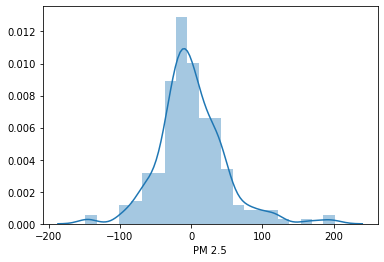

In [41]:
sns.distplot(y_test-pred)

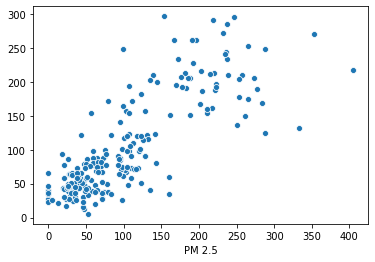

In [42]:
sns.scatterplot(y_test,pred)

In [58]:
params={'n_estimators':[n for n in range(100,1200,100)],'max_depth':[n for n in range(3,15,5)],'learn_rate':[0.05,0.01,0.1,0.2,0.3,0.7],'subsample':[0.7,0.6,0.8],'min_child_weight':[3,4,5,6,7]}


rv=RandomizedSearchCV(boost,param_distributions=params,scoring='neg_mean_squared_error',n_iter=100,cv=3)
rv.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster=None,
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_...
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'learn_rate': [0.05, 0.01, 0.1, 0.2,
                                                  

In [65]:
from sklearn.metrics import mean_squared_error

In [67]:
pred=rv.predict(x_test)
print('R2 value is',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))

R2 value is 0.6050294920178341
MAE 35.61485587189731
MSE 2477.610266705279
